In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pre
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train = train.drop('duration', axis = 1) # dropped because if duration = 0, deposit always = no. We wouldn't have this
                                         # variable in a real dataset, as advised by kaggle/UCI
train_x = train[[i for i in train.columns if i != 'deposit']]
train_y = train['deposit']
train_y = train_y.replace({'yes':1,'no':0})

In [3]:
train_x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown
1,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown
2,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown
3,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,2,-1,0,unknown
4,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1,-1,0,unknown


C:\Users\Josep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


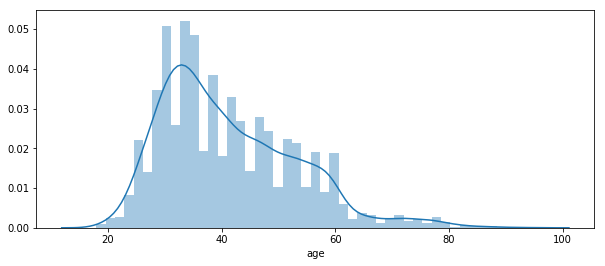

In [4]:
plt.figure(num = "Age Plot", figsize =  (10,4))
sns.distplot(train_x['age'])
plt.show()
# most clients are mid/late thirties

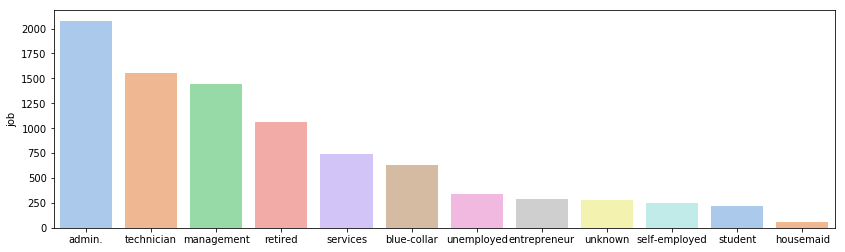

In [5]:
plt.figure(num = 'job plot', figsize = (14,4))
sns.barplot(x = train_x['job'].unique(), y = train_x['job'].value_counts(), palette = "pastel")
plt.show()
# the 'office professional' jobs make up the vast majority of clients, followed by retireees

In [6]:
train_x['marital'].value_counts()
# more people are married than single and divorced combined

married     5081
single      2826
divorced    1023
Name: marital, dtype: int64

In [7]:
train_x = pd.get_dummies(train_x)

In [8]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [9]:
clf.fit(train_x, train_y) # trains the decision tree

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### model details

In [10]:
importances = pd.DataFrame(data = {'feature':train_x.columns,'importance':clf.feature_importances_})
importances = importances.sort_values('importance',ascending = False)

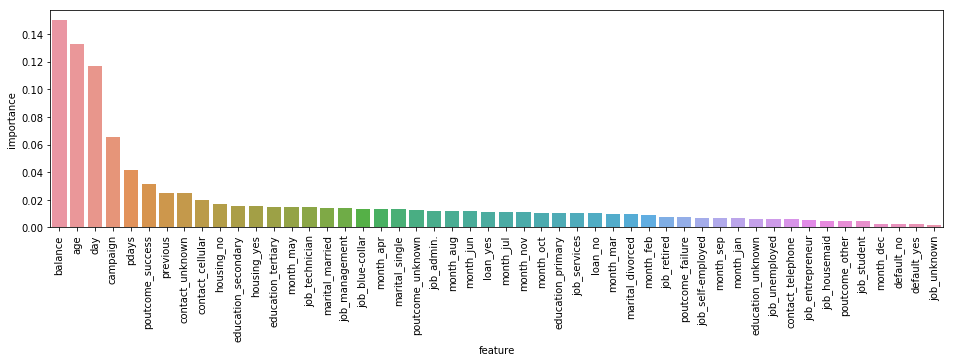

In [11]:
plt.figure('Importances', figsize = (16,4))
plt.xticks(rotation = 90)
sns.barplot(x = importances['feature'], y = importances['importance']);
# the most important feature are the client's balance, their age, and seemingly the day of the month they were called

### model prediction

In [12]:
# if this were productionised, this cell would be all you'd need to re-use the model each time
# pickle.dump(clf,open('random_forests.pkl',mode = "wb"))
# clf = pickle.load(open('model.pkl',mode = "rb"))

In [13]:
test = pd.read_csv('test.csv')
test = test.drop('duration', axis = 1)
test_x = test[[i for i in train.columns if i != 'deposit']]
test_y = test[['deposit']]
test_y = test_y.replace({'yes':1,'no':0})
test_x = pd.get_dummies(test_x)

In [14]:
predictions = clf.predict(test_x)

In [15]:
clf.score(train_x,train_y)

1.0

In [16]:
clf.score(test_x,test_y)

0.7325268817204301